In [26]:
%matplotlib inline

In [28]:
# -*- coding: utf-8 -*-

"""Copyright 2015 Roger R Labbe Jr.


Code supporting the book

Kalman and Bayesian Filters in Python
https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python


This is licensed under an MIT license. See the LICENSE.txt file
for more information.
"""

from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

from contextlib import contextmanager
import ipywidgets
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np


_default_size = (9, 4)

def equal_axis(sz=_default_size[0]):
    """ set size of axis in inches, using the same for each"""
    pylab.rcParams['figure.figsize'] = sz, sz
    plt.axis('equal')

def reset_figsize():
    """ reest axis size in inches to the default size for the book"""
    mpl.rcParams['figure.figsize'] = _default_size


def set_figsize(x=_default_size[0], y=_default_size[1]):
    """ set the figure size of the plot to the specified size in inches"""

    mpl.rcParams['figure.figsize'] = x, y


@contextmanager
def figsize(x=8, y=3):
    """Temporarily set the figure size using 'with figsize(a, b):'"""

    size = pylab.rcParams['figure.figsize']
    set_figsize(x, y)
    yield
    pylab.rcParams['figure.figsize'] = size


""" If the plot is inline (%matplotlib inline) we need to
do special processing for the interactive_plot context manager,
otherwise it outputs a lot of extra <matplotlib.figure.figure
type output into the notebook."""

IS_INLINE = mpl.get_backend().find('backend_inline') != -1


def plot_errorbars(bars, xlims, ylims=(-1, 1)):
    """Plots a list of error bars with optional x and y limits.
    The list `bars` is a list of tuples (or any iterable) containing

    (mean value, error plus/minus, label)

    For example (160, 3, 'A') draws an error bar from 157 to 163, with the
    legend label 'A`)

    Parameters
    ----------

    bars : list
        list of tuples in form (mean, error +/-, label)

    x-lims : tuple
        tuple containing min and max values for x axis

    y-lims : tuple, optional
        tuple containing min and max values for y axis ( the default is (-1, 1))

    Example
    -------
    >>> plot_errorbars([(160, 3, 'A'), (170, 9, 'B')], xlims=(150, 180))
    """

    with figsize(y=2):
        i = 0.0
        for bar in bars:
            plt.errorbar([bar[0]], [i], xerr=[bar[1]], fmt='o', label=bar[2] , capthick=2, capsize=10)
            i += 0.2

        plt.ylim(*ylims)
        plt.xlim(xlims[0], xlims[1])
        show_legend()
        plt.gca().axes.yaxis.set_ticks([])
        plt.show()


def predict_update_chart(box_bg = '#CCCCCC',
                arrow1 = '#88CCFF',
                arrow2 = '#88FF88'):
    plt.figure(figsize=(4, 4), facecolor='w')
    ax = plt.axes((0, 0, 1, 1),
                  xticks=[], yticks=[], frameon=False)

    pc = Circle((4, 5), 0.7, fc=box_bg)
    uc = Circle((6, 5), 0.7, fc=box_bg)
    ax.add_patch (pc)
    ax.add_patch (uc)

    plt.text(4, 5, "Predict\nStep",ha='center', va='center', fontsize=12)
    plt.text(6, 5, "Update\nStep",ha='center', va='center', fontsize=12)

    #btm arrow from update to predict
    ax.annotate('',
                xy=(4.1, 4.5),  xycoords='data',
                xytext=(6, 4.5), textcoords='data',
                size=20,
                arrowprops=dict(arrowstyle="simple",
                                fc="0.6", ec="none",
                                patchB=pc,
                                patchA=uc,
                                connectionstyle="arc3,rad=-0.5"))
    #top arrow from predict to update
    ax.annotate('',
                xy=(6, 5.5),  xycoords='data',
                xytext=(4.1, 5.5), textcoords='data',
                size=20,
                arrowprops=dict(arrowstyle="simple",
                                fc="0.6", ec="none",
                                patchB=uc,
                                patchA=pc,
                                connectionstyle="arc3,rad=-0.5"))

    ax.annotate('Measurement ($\mathbf{z_k}$)',
                xy=(6.3, 5.6),  xycoords='data',
                xytext=(6,6), textcoords='data',
                size=14,
                arrowprops=dict(arrowstyle="simple",
                                fc="0.6", ec="none"))

    # arrow from predict to state estimate
    ax.annotate('',
                xy=(4.0, 3.8),  xycoords='data',
                xytext=(4.0,4.3), textcoords='data',
                size=12,
                arrowprops=dict(arrowstyle="simple",
                                fc="0.6", ec="none"))

    ax.annotate('Initial\nConditions ($\mathbf{x_0}$)',
                xy=(4.05, 5.7),  xycoords='data',
                xytext=(2.5, 6.5), textcoords='data',
                size=14,
                arrowprops=dict(arrowstyle="simple",
                                fc="0.6", ec="none"))

    plt.text (4, 3.7,'State Estimate ($\mathbf{\hat{x}_k}$)',
              ha='center', va='center', fontsize=14)
    plt.axis('equal')
    plt.show()


def show_residual_chart(show_eq=True, show_H=False):
    plt.figure(figsize=(11, 3.), facecolor='w')
    est_y = ((164.2 - 158)*.8 + 158)

    ax = plt.axes(xticks=[], yticks=[], frameon=False)
    ax.annotate('', xy=[1,159], xytext=[0, 158],
                arrowprops=dict(arrowstyle='->',
                                ec='r', lw=3, shrinkA=6, shrinkB=5))

    ax.annotate('', xy=[1, 159], xytext=[1, 164.2],
                arrowprops=dict(arrowstyle='-',
                                ec='k', lw=3, shrinkA=8, shrinkB=8))

    ax.annotate('', xy=(1., est_y), xytext=(0.9, est_y),
                arrowprops=dict(arrowstyle='->', ec='#004080',
                                lw=2,
                                shrinkA=3, shrinkB=4))


    plt.scatter ([0,1], [158.0,est_y], c='k',s=128)
    plt.scatter ([1], [164.2], c='b',s=128)
    plt.scatter ([1], [159], c='r', s=128)
    plt.text (1.05, 158.8, r"prior $(\bar{x}_t)$", ha='center',va='top',fontsize=18,color='red')
    plt.text (0.5, 159.6, "prediction", ha='center',va='top',fontsize=18,color='red')
    plt.text (1.0, 164.4, r"measurement ($z$)",ha='center',va='bottom',fontsize=18,color='blue')
    plt.text (0, 157.8, r"posterior ($x_{t-1}$)", ha='center', va='top',fontsize=18)
    plt.text (1.02, est_y-1.5, "residual($y$)", ha='left', va='center',fontsize=18)
    if show_eq:
        if show_H:
            plt.text (1.02, est_y-2.2, r"$y=z-H\bar x_t$", ha='left', va='center',fontsize=18)
        else:
            plt.text (1.02, est_y-2.2, r"$y=z-\bar x_t$", ha='left', va='center',fontsize=18)
    plt.text (0.9, est_y, "new estimate ($x_t$)", ha='right', va='center',fontsize=18)
    plt.text (0.8, est_y-0.5, "(posterior)", ha='right', va='center',fontsize=18)
    if show_eq:
        plt.text (0.75, est_y-1.2, r"$\bar{x}_t + Ky$", ha='right', va='center',fontsize=18)
    plt.xlabel('time')
    ax.yaxis.set_label_position("right")
    plt.ylabel('state')
    plt.xlim(-0.1, 1.5)


def show_legend():
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


def bar_plot(pos, x=None, ylim=(0,1), title=None, c='#30a2da',
             **kwargs):
    """ plot the values in `pos` as a bar plot.

    **Parameters**

    pos : list-like
        list of values to plot as bars

    x : list-like, optional
         If provided, specifies the x value for each value in pos. If not
         provided, the first pos element is plotted at x == 0, the second
         at 1, etc.

    ylim : (lower, upper), default = (0,1)
        specifies the lower and upper limits for the y-axis

    title : str, optional
        If specified, provides a title for the plot

    c : color, default='#30a2da'
        Color for the bars

    **kwargs : keywords, optional
        extra keyword arguments passed to ax.bar()

    """

    ax = plt.gca()
    if x is None:
        x = np.arange(len(pos))
    ax.bar(x, pos, color=c, **kwargs)
    if ylim:
        plt.ylim(ylim)
    plt.xticks(np.asarray(x), x)
    if title is not None:
        plt.title(title)


def plot_belief_vs_prior(belief, prior, **kwargs):
    """ plots two discrete probability distributions side by side, with
    titles "belief" and "prior"
    """

    plt.subplot(121)
    bar_plot(belief, title='belief', **kwargs)
    plt.subplot(122)
    bar_plot(prior, title='prior', **kwargs)


def plot_prior_vs_posterior(prior, posterior, reverse=False, **kwargs):
    """ plots two discrete probability distributions side by side, with
    titles "prior" and "posterior"
    """
    if reverse:
        plt.subplot(121)
        bar_plot(posterior, title='posterior', **kwargs)
        plt.subplot(122)
        bar_plot(prior, title='prior', **kwargs)
    else:
        plt.subplot(121)
        bar_plot(prior, title='prior', **kwargs)
        plt.subplot(122)
        bar_plot(posterior, title='posterior', **kwargs)


def set_labels(title=None, x=None, y=None):
    """ helps make code in book shorter. Optional set title, xlabel and ylabel
    """
    if x is not None:
        plt.xlabel(x)
    if y is not None:
        plt.ylabel(y)
    if title is not None:
        plt.title(title)


def set_limits(x, y):
    """ helper function to make code in book shorter. Set the limits for the x
    and y axis.
    """

    plt.gca().set_xlim(x)
    plt.gca().set_ylim(y)

def plot_predictions(p, rng=None, label='Prediction'):
    if rng is None:
        rng = range(len(p))
    plt.scatter(rng, p, marker='v', s=40, edgecolor='r',
                facecolor='None', lw=2, label=label)


def plot_kf_output(xs, filter_xs, zs, title=None, aspect_equal=True):
    plot_filter(filter_xs[:, 0])
    plot_track(xs[:, 0])

    if zs is not None:
        plot_measurements(zs)
    show_legend()
    set_labels(title=title, y='meters', x='time (sec)')
    if aspect_equal:
        plt.gca().set_aspect('equal')
    plt.xlim((-1, len(xs)))
    plt.show()


def FloatSlider(value, **kwargs):
    """
    Creates an ipwidgets FloatSlider with continuous update
    turned off
    """
    return ipywidgets.FloatSlider(value, continuous_update=False, **kwargs)


def IntSlider(value, **kwargs):
    """
    Creates an ipwidgets IntSlider with continuous update
    turned off
    """
    return ipywidgets.IntSlider(value, continuous_update=False, **kwargs)


def plot_measurements(xs, ys=None, dt=None, color='k', lw=1, label='Measurements',
                      lines=False, **kwargs):
    """ Helper function to give a consistant way to display
    measurements in the book.
    """
    if ys is None and dt is not None:
        ys = xs
        xs = np.arange(0, len(ys)*dt, dt)

    plt.autoscale(tight=False)
    if lines:
        if ys is not None:
            return plt.plot(xs, ys, color=color, lw=lw, ls='--', label=label, **kwargs)
        else:
            return plt.plot(xs, color=color, lw=lw, ls='--', label=label, **kwargs)
    else:
        if ys is not None:
            return plt.scatter(xs, ys, edgecolor=color, facecolor='none',
                        lw=2, label=label, **kwargs),
        else:
            return plt.scatter(range(len(xs)), xs, edgecolor=color, facecolor='none',
                        lw=2, label=label, **kwargs),


def plot_residual_limits(Ps, stds=1.):
    """ plots standand deviation given in Ps as a yellow shaded region. One std
    by default, use stds for a different choice (e.g. stds=3 for 3 standard
    deviations.
    """

    std = np.sqrt(Ps) * stds

    plt.plot(-std, color='k', ls=':', lw=2)
    plt.plot(std, color='k', ls=':', lw=2)
    plt.fill_between(range(len(std)), -std, std,
                 facecolor='#ffff00', alpha=0.3)


def plot_track(xs, ys=None, dt=None, label='Track', c='k', lw=2, **kwargs):
    if ys is None and dt is not None:
        ys = xs
        xs = np.arange(0, len(ys)*dt, dt)
    if ys is not None:
        return plt.plot(xs, ys, color=c, lw=lw, ls=':', label=label, **kwargs)
    else:
        return plt.plot(xs, color=c, lw=lw, ls=':', label=label, **kwargs)


def plot_filter(xs, ys=None, dt=None, c='C0', label='Filter', var=None, **kwargs):
    """ plot result of KF with color `c`, optionally displaying the variance
    of `xs`. Returns the list of lines generated by plt.plot()"""

    if ys is None and dt is not None:
        ys = xs
        xs = np.arange(0, len(ys) * dt, dt)
    if ys is None:
        ys = xs
        xs = range(len(ys))

    lines = plt.plot(xs, ys, color=c, label=label, **kwargs)
    if var is None:
        return lines

    var = np.asarray(var)
    std = np.sqrt(var)
    std_top = ys+std
    std_btm = ys-std

    plt.plot(xs, ys+std, linestyle=':', color='k', lw=2)
    plt.plot(xs, ys-std, linestyle=':', color='k', lw=2)
    plt.fill_between(xs, std_btm, std_top,
                     facecolor='yellow', alpha=0.2)

    return lines


def _blob(x, y, area, colour):
    """
    Draws a square-shaped blob with the given area (< 1) at
    the given coordinates.
    """
    hs = np.sqrt(area) / 2
    xcorners = np.array([x - hs, x + hs, x + hs, x - hs])
    ycorners = np.array([y - hs, y - hs, y + hs, y + hs])
    plt.fill(xcorners, ycorners, colour, edgecolor=colour)


def hinton(W, maxweight=None):
    """
    Draws a Hinton diagram for visualizing a weight matrix.
    Temporarily disables matplotlib interactive mode if it is on,
    otherwise this takes forever.
    """
    reenable = False
    if plt.isinteractive():
        plt.ioff()

    plt.clf()
    height, width = W.shape
    if not maxweight:
        maxweight = 2**np.ceil(np.log(np.max(np.abs(W)))/np.log(2))

    plt.fill(np.array([0, width, width, 0]),
             np.array([0, 0, height, height]),
             'gray')

    plt.axis('off')
    plt.axis('equal')
    for x in range(width):
        for y in range(height):
            _x = x+1
            _y = y+1
            w = W[y, x]
            if w > 0:
                _blob(_x - 0.5,
                      height - _y + 0.5,
                      min(1, w/maxweight),
                      'white')
            elif w < 0:
                _blob(_x - 0.5,
                      height - _y + 0.5,
                      min(1, -w/maxweight),
                      'black')
    if reenable:
        plt.ion()


In [27]:
from numpy.random import randn

class PosSensor(object):
    def __init__(self, pos=(0, 0), vel=(0, 0), noise_std=1.):
        self.vel = vel
        self.noise_std = noise_std
        self.pos = [pos[0], pos[1]]
        
    def read(self):
        self.pos[0] += self.vel[0]
        self.pos[1] += self.vel[1]
        
        return [self.pos[0] + randn() * self.noise_std,
                self.pos[1] + randn() * self.noise_std]

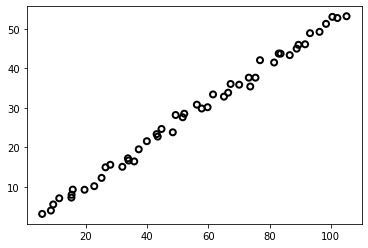

In [29]:
import matplotlib.pyplot as plt
import numpy as np

pos, vel = (4, 3), (2, 1)
sensor = PosSensor(pos, vel, noise_std=1)
ps = np.array([sensor.read() for _ in range(50)])
plot_measurements(ps[:, 0], ps[:, 1]);

In [30]:
from filterpy.kalman import KalmanFilter

tracker = KalmanFilter(dim_x=4, dim_z=2)
dt = 1.   # time step 1 second

tracker.F = np.array([[1, dt, 0,  0],
                      [0,  1, 0,  0],
                      [0,  0, 1, dt],
                      [0,  0, 0,  1]])

In [31]:
from scipy.linalg import block_diag
from filterpy.common import Q_discrete_white_noise

q = Q_discrete_white_noise(dim=2, dt=dt, var=0.001)
tracker.Q = block_diag(q, q)
print(tracker.Q)

[[0.    0.001 0.    0.   ]
 [0.001 0.001 0.    0.   ]
 [0.    0.    0.    0.001]
 [0.    0.    0.001 0.001]]


In [32]:
tracker.B

In [33]:
tracker.H = np.array([[1/0.3048, 0, 0,        0],
                      [0,        0, 1/0.3048, 0]])

In [34]:
tracker.R = np.array([[5., 0],
                      [0, 5]])
tracker.R

array([[5., 0.],
       [0., 5.]])

In [35]:
tracker.x = np.array([[0, 0, 0, 0]]).T
tracker.P = np.eye(4) * 500.

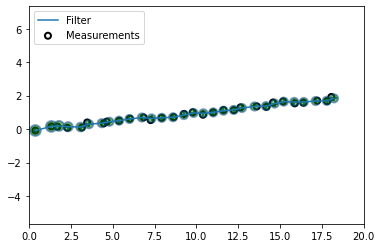

In [36]:
from filterpy.stats import plot_covariance_ellipse

R_std = 0.35
Q_std = 0.04

def tracker1():
    tracker = KalmanFilter(dim_x=4, dim_z=2)
    dt = 1.0   # time step

    tracker.F = np.array([[1, dt, 0,  0],
                          [0,  1, 0,  0],
                          [0,  0, 1, dt],
                          [0,  0, 0,  1]])
    tracker.u = 0.
    tracker.H = np.array([[1/0.3048, 0, 0, 0],
                          [0, 0, 1/0.3048, 0]])

    tracker.R = np.eye(2) * R_std**2
    q = Q_discrete_white_noise(dim=2, dt=dt, var=Q_std**2)
    tracker.Q = block_diag(q, q)
    tracker.x = np.array([[0, 0, 0, 0]]).T
    tracker.P = np.eye(4) * 500.
    return tracker

# simulate robot movement
N = 30
sensor = PosSensor((0, 0), (2, .2), noise_std=R_std)

zs = np.array([sensor.read() for _ in range(N)])

# run filter
robot_tracker = tracker1()
mu, cov, _, _ = robot_tracker.batch_filter(zs)

for x, P in zip(mu, cov):
    # covariance of x and y
    cov = np.array([[P[0, 0], P[2, 0]], 
                    [P[0, 2], P[2, 2]]])
    mean = (x[0, 0], x[2, 0])
    plot_covariance_ellipse(mean, cov=cov, fc='g', std=3, alpha=0.5)
    
#plot results
zs *= .3048 # convert to meters
plot_filter(mu[:, 0], mu[:, 2])
plot_measurements(zs[:, 0], zs[:, 1])
plt.legend(loc=2)
plt.xlim(0, 20);

In [37]:
print(np.diag(robot_tracker.P))

[0.007 0.003 0.007 0.003]


[[0.007 0.003]
 [0.003 0.003]]


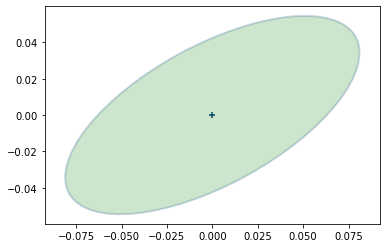

In [38]:
c = robot_tracker.P[0:2, 0:2]
print(c)
plot_covariance_ellipse((0, 0), cov=c, fc='g', alpha=0.2)

In [39]:
robot_tracker.P[2:4, 0:2]

array([[0., 0.],
       [0., 0.]])

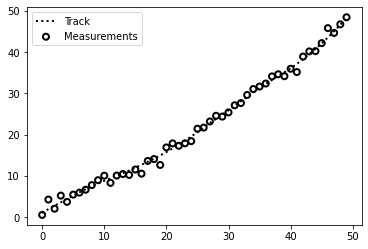

In [40]:


class ConstantVelocityObject(object):
    def __init__(self, x0=0, vel=1., noise_scale=0.06):
        self.x = x0
        self.vel = vel
        self.noise_scale = noise_scale

    def update(self):
        self.vel += randn() * self.noise_scale
        self.x += self.vel
        return (self.x, self.vel)

def sense(x, noise_scale=1.):
    return x[0] + randn()*noise_scale

np.random.seed(124)
obj = ConstantVelocityObject()

xs, zs = [], []
for i in range(50):
    x = obj.update()
    z = sense(x)
    xs.append(x)
    zs.append(z)

xs = np.asarray(xs)

plot_track(xs[:, 0])
plot_measurements(range(len(zs)), zs)
plt.legend(loc='best');

In [41]:
def ZeroOrderKF(R, Q, P=20):
    """ Create zero order Kalman filter.
    Specify R and Q as floats."""
    
    kf = KalmanFilter(dim_x=1, dim_z=1)
    kf.x = np.array([0.])
    kf.R *= R
    kf.Q *= Q
    kf.P *= P
    kf.F = np.eye(1)
    kf.H = np.eye(1)
    return kf

In [42]:
def FirstOrderKF(R, Q, dt):
    """ Create first order Kalman filter. 
    Specify R and Q as floats."""
    
    kf = KalmanFilter(dim_x=2, dim_z=1)
    kf.x = np.zeros(2)
    kf.P *= np.array([[100, 0], [0, 1]])
    kf.R *= R
    kf.Q = Q_discrete_white_noise(2, dt, Q)
    kf.F = np.array([[1., dt],
                     [0., 1]])
    kf.H = np.array([[1., 0]])
    return kf

In [43]:
def SecondOrderKF(R_std, Q, dt, P=100):
    """ Create second order Kalman filter. 
    Specify R and Q as floats."""
    
    kf = KalmanFilter(dim_x=3, dim_z=1)
    kf.x = np.zeros(3)
    kf.P[0, 0] = P
    kf.P[1, 1] = 1
    kf.P[2, 2] = 1
    kf.R *= R_std**2
    kf.Q = Q_discrete_white_noise(3, dt, Q)
    kf.F = np.array([[1., dt, .5*dt*dt],
                     [0., 1.,       dt],
                     [0., 0.,       1.]])
    kf.H = np.array([[1., 0., 0.]])
    return kf

In [44]:
def simulate_system(Q, count):
    obj = ConstantVelocityObject(x0=.0, vel=0.5, noise_scale=Q)
    xs, zs = [], []
    for i in range(count):
        x = obj.update()
        z = sense(x)
        xs.append(x)
        zs.append(z)
    return np.array(xs), np.array(zs)from kf_book.book_plots import plot_residual_limits, set_labels

def plot_residuals(xs, data, col, title, y_label, stds=1):
    res = xs - data.x[:, col]
    plt.plot(res)
    plot_residual_limits(data.P[:, col, col], stds)
    set_labels(title, 'time (sec)', y_label)

In [45]:
from filterpy.common import Saver

def filter_data(kf, zs):
    s = Saver(kf)
    kf.batch_filter(zs, saver=s)
    s.to_array()
    return s

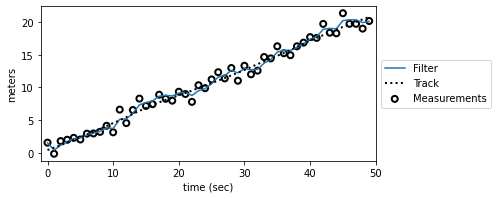

In [46]:

R, Q = 1, 0.03
xs, zs = simulate_system(Q=Q, count=50)

kf = FirstOrderKF(R, Q, dt=1)
data1 = filter_data(kf, zs)

plot_kf_output(xs, data1.x, data1.z)

In [47]:

def plot_residuals(xs, data, col, title, y_label, stds=1):
    res = xs - data.x[:, col]
    plt.plot(res)
    plot_residual_limits(data.P[:, col, col], stds)
    set_labels(title, 'time (sec)', y_label)

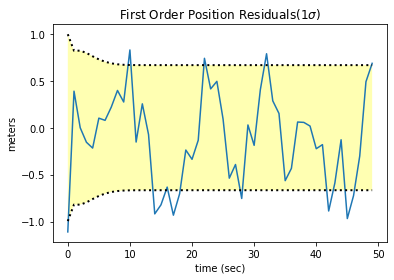

In [48]:
plot_residuals(xs[:, 0], data1, 0, 
               title='First Order Position Residuals(1$\sigma$)',
               y_label='meters')   

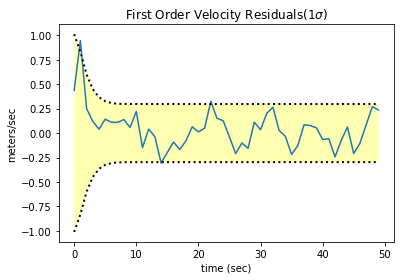

In [49]:
plot_residuals(xs[:, 1], data1, 1, 
               title='First Order Velocity Residuals(1$\sigma$)',
               y_label='meters/sec')   

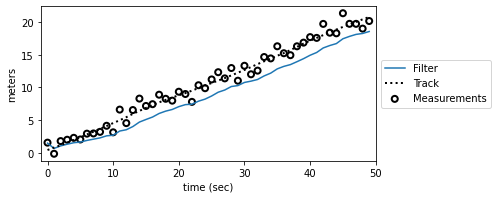

In [50]:
kf0 = ZeroOrderKF(R, Q)
data0 = filter_data(kf0, zs)
plot_kf_output(xs, data0.x, data0.z)

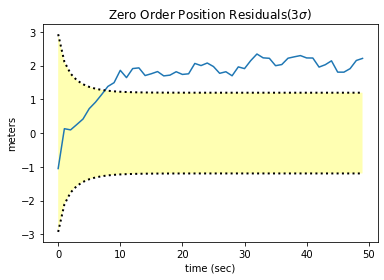

In [51]:
plot_residuals(xs[:, 0], data0, 0, 
               title='Zero Order Position Residuals(3$\sigma$)',
               y_label='meters',
               stds=3)

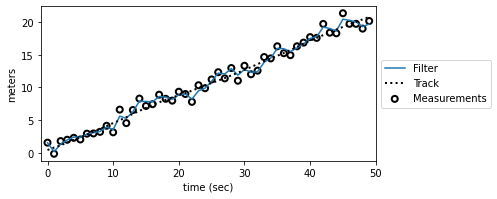

In [52]:
kf2 = SecondOrderKF(R, Q, dt=1)
data2 = filter_data(kf2, zs)
plot_kf_output(xs, data2.x, data2.z)

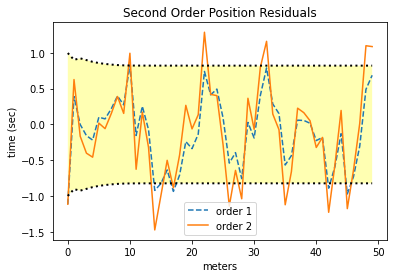

In [53]:
res2 = xs[:, 0] - data2.x[:, 0]
res1 = xs[:, 0] - data1.x[:, 0]

plt.plot(res1, ls="--", label='order 1')
plt.plot(res2, label='order 2')
plot_residual_limits(data2.P[:, 0, 0])
set_labels('Second Order Position Residuals',
           'meters', 'time (sec)')
plt.legend();

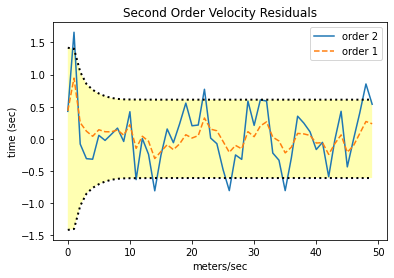

In [54]:
res2 = xs[:, 1] - data2.x[:, 1]
res1 = xs[:, 1] - data1.x[:, 1]

plt.plot(res2, label='order 2')
plt.plot(res1, ls='--', label='order 1')
plot_residual_limits(data2.P[:, 1, 1])
set_labels('Second Order Velocity Residuals', 
                      'meters/sec', 'time (sec)')
plt.legend();

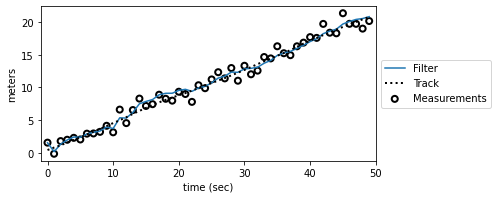

In [55]:
kf2 = SecondOrderKF(R, 0, dt=1)
data2 = filter_data(kf2, zs)
plot_kf_output(xs, data2.x, data2.z)

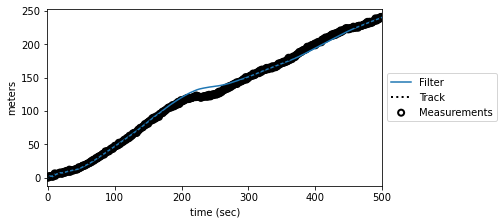

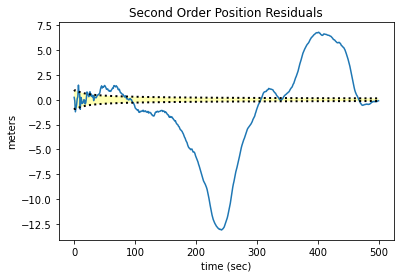

In [56]:
np.random.seed(25944)
xs500, zs500 = simulate_system(Q=Q, count=500)

kf2 = SecondOrderKF(R, 0, dt=1)
data500 = filter_data(kf2, zs500)

plot_kf_output(xs500, data500.x, data500.z)
plot_residuals(xs500[:, 0], data500, 0, 
               'Second Order Position Residuals',
               'meters') 

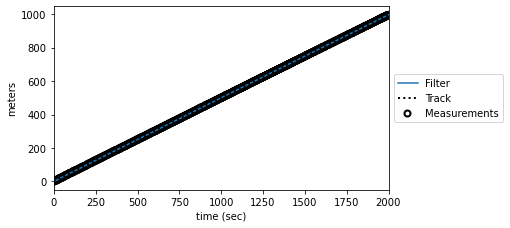

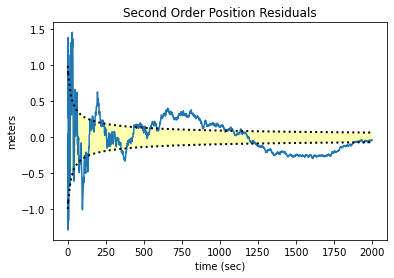

In [57]:
np.random.seed(32594)
xs2000, zs2000 = simulate_system(Q=0.0001, count=2000)

kf2 = SecondOrderKF(R, 0, dt=1)
data2000 = filter_data(kf2, zs2000)

plot_kf_output(xs2000, data2000.x, data2000.z)
plot_residuals(xs2000[:, 0], data2000, 0, 
               'Second Order Position Residuals',
               'meters') 

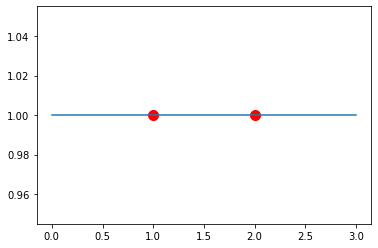

In [58]:
plt.scatter([1, 2], [1, 1], s=100, c='r')
plt.plot([0, 3], [1, 1]);

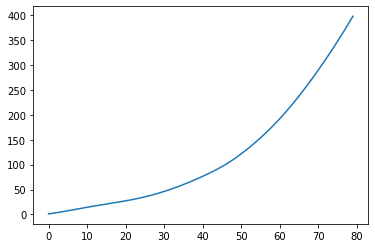

In [59]:
class ConstantAccelerationObject(object):
    def __init__(self, x0=0, vel=1., acc=0.1, acc_noise=.1):
        self.x = x0
        self.vel = vel
        self.acc = acc
        self.acc_noise_scale = acc_noise
    
    def update(self):
        self.acc += randn() * self.acc_noise_scale       
        self.vel += self.acc
        self.x += self.vel
        return (self.x, self.vel, self.acc)
  
R, Q = 6., 0.02
def simulate_acc_system(R, Q, count):
    obj = ConstantAccelerationObject(acc_noise=Q)
    zs = []
    xs = []
    for i in range(count):
        x = obj.update()
        z = sense(x, R)
        xs.append(x)
        zs.append(z)
    return np.asarray(xs), zs

np.random.seed(124)
xs, zs = simulate_acc_system(R=R, Q=Q, count=80)
plt.plot(xs[:, 0]);

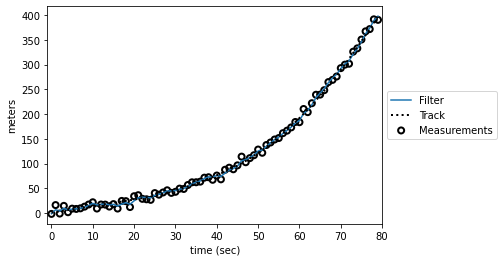

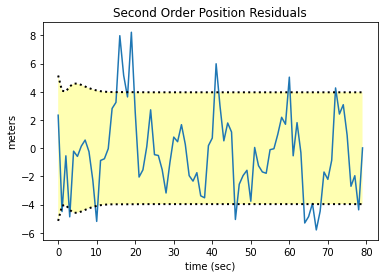

In [60]:
np.random.seed(124)
xs, zs = simulate_acc_system(R=R, Q=Q, count=80)

kf2 = SecondOrderKF(R, Q, dt=1)
data2 = filter_data(kf2, zs)

plot_kf_output(xs, data2.x, data2.z, aspect_equal=False)
plot_residuals(xs[:, 0], data2, 0, 
               'Second Order Position Residuals',
               'meters') 

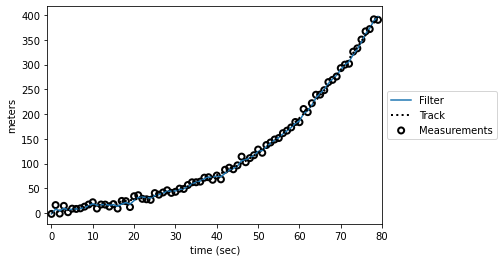

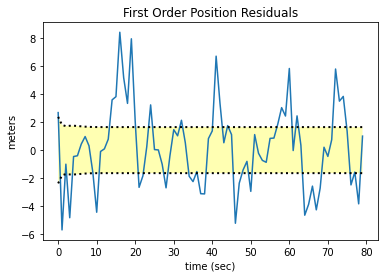

In [61]:
kf3 = FirstOrderKF(R, Q * 10, dt=1)
data3= filter_data(kf3, zs)

plot_kf_output(xs, data3.x, data3.z, aspect_equal=False)
plot_residuals(xs[:, 0], data3, 0, 
               'First Order Position Residuals',
               'meters') 

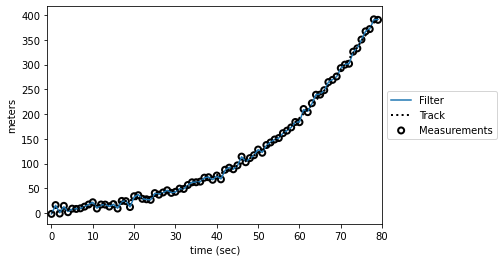

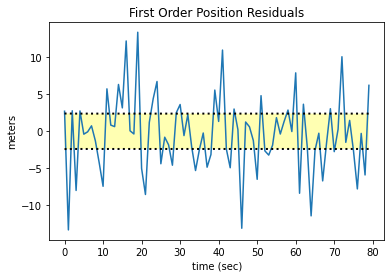

In [62]:
kf4 = FirstOrderKF(R, Q * 10000, dt=1)
data4 = filter_data(kf4, zs)

plot_kf_output(xs, data4.x, data4.z, aspect_equal=False)
plot_residuals(xs[:, 0], data4, 0, 
               'First Order Position Residuals',
               'meters') 

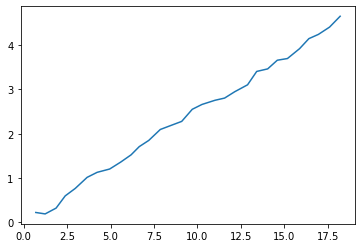

In [63]:
N = 30 # number of iterations
dt = 1.0 # time step
R_std = 0.35
Q_std = 0.04

M_TO_FT = 1 / 0.3048

sensor = PosSensor((0, 0), (2, .5), noise_std=R_std)
zs = np.array([sensor.read() for _ in range(N)])

tracker = KalmanFilter(dim_x=4, dim_z=2)

tracker.F = np.array([[1, 0, dt,  0],
                      [0, 1,  0, dt],
                      [0, 0,  1,  0],
                      [0, 0,  0,  1]])

tracker.H = np.array([[M_TO_FT, 0, 0, 0],
                      [0, M_TO_FT, 0, 0]])

tracker.R = np.eye(2) * R_std**2
q = Q_discrete_white_noise(dim=2, dt=dt, var=Q_std**2)
tracker.Q[0,0] = q[0,0]
tracker.Q[1,1] = q[0,0]
tracker.Q[2,2] = q[1,1]
tracker.Q[3,3] = q[1,1]
tracker.Q[0,2] = q[0,1]
tracker.Q[2,0] = q[0,1]
tracker.Q[1,3] = q[0,1]
tracker.Q[3,1] = q[0,1]

tracker.x = np.array([[0, 0, 0, 0]]).T
tracker.P = np.eye(4) * 500.

xs, ys = [], []
for z in zs:
    tracker.predict()
    tracker.update(z)
    xs.append(tracker.x[0])
    ys.append(tracker.x[1])
plt.plot(xs, ys);

In [64]:
from filterpy.common import kinematic_kf

kf = kinematic_kf(dim=2, order=1, dt=1.0, order_by_dim=False)
kf.Q = np.diag([0, 0, .003, .003])
kf.x = np.array([[1., 1., 0., 0.]]).T
kf.R = np.diag([0.03, 0.21]) # use different errors

for i in range(101):
    kf.predict()
    kf.update(np.array([[i*.05, i*.05]])) # around 200 kph

p0 = kf.x[0:2]

kf.predict()
prior = kf.x
z = kf.x[0:2]*2
kf.update(z)
p1 = kf.x[0:2]

# compute error of measurement from prior
y = np.abs(z - kf.H @ prior)
dist = np.linalg.norm(y)

np.set_printoptions(precision=2, suppress=True)

print(f'bad measurement       : {z.T} km')
print(f'before bad measurement: {p0.T} km')
print(f'after bad measurement : {p1.T} km')
print(f'estimate shift        : {np.linalg.norm(p1 - prior[:2]):.1f} km')
print(f'distance from prior   : {dist:.1f} km')

bad measurement       : [[10.1 10.1]] km
before bad measurement: [[5. 5.]] km
after bad measurement : [[7.84 7.01]] km
estimate shift        : 3.4 km
distance from prior   : 7.1 km


In [65]:
print(f'error = {np.linalg.norm(kf.y):.1f} km, at a speed of {dist*3600:.0f} kph')

error = 7.1 km, at a speed of 25710 kph


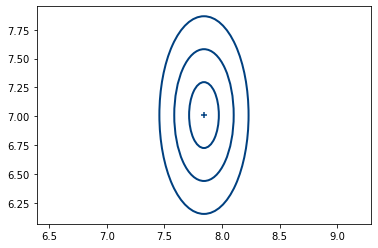

In [66]:
x, P = kf.x[0:2], kf.P[0:2, 0:2]
plot_covariance_ellipse(x, P, std=[1,2,3])

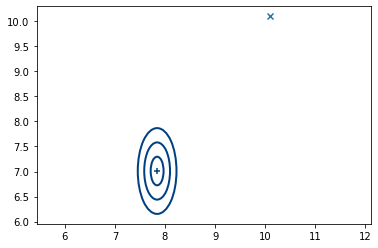

In [67]:
plot_covariance_ellipse(x, P, std=[1,2,3])
plt.scatter(z[0], z[1], marker='x');

In [68]:
GATE_LIMIT = 4.
std_x = np.sqrt(P[0,0])
std_y = np.sqrt(P[1,1])
y = kf.residual_of(z)[:,0]

if y[0] > GATE_LIMIT * std_x or y[1] > GATE_LIMIT * std_y:
    print(f'discarding measurement, error is {y[0]/std_x:.0f} std, {y[1]/std_y:.0f} std')
    
print('y   is', y)
print(f'std is {std_x:.2f} {std_y:.2f}')

discarding measurement, error is 39 std, 18 std
y   is [5.05 5.05]
std is 0.13 0.29
